<a href="https://colab.research.google.com/github/Alirezaprogramerrd99/AIMedic_Internship_Projects/blob/main/Pytorch_CNN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing libs:

In [ ]:
# implementing CNN for MNIST data set using Pytorch.
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torch import optim
from torch.autograd import Variable
from matplotlib import pyplot as plt

## Loading mnist dataset:

In [ ]:
# os.listdir(os.path.join('sample_data'))
data = np.loadtxt('sample_data/mnist_train_small.csv', delimiter=',')
test_data = np.loadtxt('sample_data/mnist_test.csv', delimiter=',')

In [ ]:
print('MNIST data shape: ',data.shape)
print('test data shape: ',test_data.shape)

MNIST data shape:  (20000, 785)
test data shape:  (10000, 785)


In [ ]:
print(data[0:10])
X, y, X_test, y_test  = data[:, 1:], data[:, 0], test_data[:, 1:], test_data[:, 0]

print('\nX:', X)
print('\nlabels:', y)

[[6. 0. 0. ... 0. 0. 0.]
 [5. 0. 0. ... 0. 0. 0.]
 [7. 0. 0. ... 0. 0. 0.]
 ...
 [6. 0. 0. ... 0. 0. 0.]
 [5. 0. 0. ... 0. 0. 0.]
 [5. 0. 0. ... 0. 0. 0.]]

X: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

labels: [6. 5. 7. ... 2. 9. 5.]


In [ ]:
for label in range(10):
    print('{} datas with label={}'.format(np.sum(y == label), label))

1962 datas with label=0
2243 datas with label=1
1989 datas with label=2
2021 datas with label=3
1924 datas with label=4
1761 datas with label=5
2039 datas with label=6
2126 datas with label=7
1912 datas with label=8
2023 datas with label=9


In [ ]:
num_classes = len((np.unique(y)))
print('number of classes: ', num_classes)

number of classes:  10


## Data visualization(on train data):

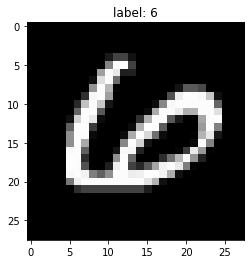

In [ ]:
plt.imshow(X[0].reshape(28, 28), cmap='gray')
plt.title('label: %i' % y[0])
plt.show()

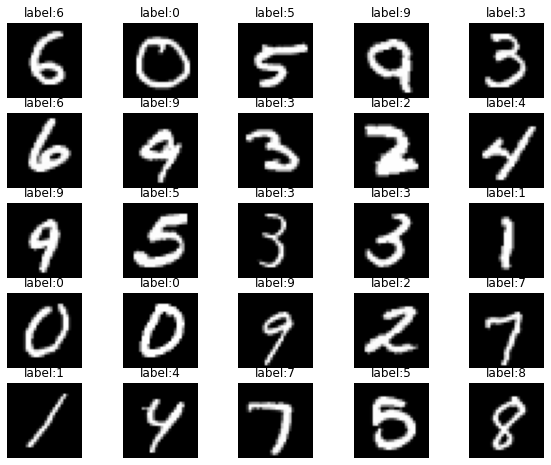

In [ ]:
# visualization for multiple datas...

figure = plt.figure(figsize=(10, 8))
cols, rows = 5, 5
for i in range(1, cols * rows + 1):
    sample_idx = np.random.randint(1, len(X), 1)
    img, label = X[sample_idx], y[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title('label:{}'.format(int(label[0])))
    plt.axis("off")
    plt.imshow(img.reshape(28, 28), cmap="gray")
plt.show()

In [ ]:
print('max values in pixels:', np.max(X))

max values in pixels: 255.0


## Normalizing Data:

In [ ]:
X /= 255.
test_data /= 255. 
print(np.unique(X)) # printing values to findout if thair normalized or not.

[0.         0.00392157 0.00784314 0.01176471 0.01568627 0.01960784
 0.02352941 0.02745098 0.03137255 0.03529412 0.03921569 0.04313725
 0.04705882 0.05098039 0.05490196 0.05882353 0.0627451  0.06666667
 0.07058824 0.0745098  0.07843137 0.08235294 0.08627451 0.09019608
 0.09411765 0.09803922 0.10196078 0.10588235 0.10980392 0.11372549
 0.11764706 0.12156863 0.1254902  0.12941176 0.13333333 0.1372549
 0.14117647 0.14509804 0.14901961 0.15294118 0.15686275 0.16078431
 0.16470588 0.16862745 0.17254902 0.17647059 0.18039216 0.18431373
 0.18823529 0.19215686 0.19607843 0.2        0.20392157 0.20784314
 0.21176471 0.21568627 0.21960784 0.22352941 0.22745098 0.23137255
 0.23529412 0.23921569 0.24313725 0.24705882 0.25098039 0.25490196
 0.25882353 0.2627451  0.26666667 0.27058824 0.2745098  0.27843137
 0.28235294 0.28627451 0.29019608 0.29411765 0.29803922 0.30196078
 0.30588235 0.30980392 0.31372549 0.31764706 0.32156863 0.3254902
 0.32941176 0.33333333 0.3372549  0.34117647 0.34509804 0.349019

### Fixing Shape of data set:

In [ ]:
X = X.reshape(-1, 1, 28, 28)
X_test = X.reshape(-1, 1, 28, 28)
X.shape

(20000, 1, 28, 28)

## converting to tensor and data set:

In [ ]:
tensor_X = torch.from_numpy(X)
y = y.astype(int);
tensor_y = torch.from_numpy(y)
test_tensor_X = torch.from_numpy(X_test)
y_test = y_test.astype(int);
test_tensor_y = torch.from_numpy(y_test)
print(tensor_X.shape)
print(tensor_y.shape)

# creating data set for train and test for plugin to dataloader...
train_set = torch.utils.data.TensorDataset(tensor_X,tensor_y)
test_set = torch.utils.data.TensorDataset(tensor_X,tensor_y)

torch.Size([20000, 1, 28, 28])
torch.Size([20000])


In [ ]:
print(train_set[0])  # viewing sample one in format (tensor, label)

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000

### Creating Data loader:

In [ ]:
BATCH_SIZE = 16

train_loader = DataLoader(train_set, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_set, batch_size=BATCH_SIZE)

for X, y in train_loader:
    print("Shape of X [N, C, H, W]: ", X.shape)
    print("Shape of y: ", y.shape, y.dtype)
    break

Shape of X [N, C, H, W]:  torch.Size([16, 1, 28, 28])
Shape of y:  torch.Size([16]) torch.int64


## Declearing CNN model:

In [ ]:
class CNN(nn.Module):   
    def __init__(self, num_classes):
        super(CNN, self).__init__()

        self.cnn_layers = nn.Sequential(
            # Defining a 2D convolution layer
            nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            # Defining another 2D convolution layer
            nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )
        self.history = {'loss':[]}
        self.linear_layers = nn.Sequential(nn.Linear(32 * 7 * 7, num_classes))

    # Defining the forward pass    
    def forward(self, x):
        x = self.cnn_layers(x)
        # flatten the output of conv2 to (batch_size, 32 * 7 * 7)
        x = x.view(x.size(0), -1)       
        output = self.linear_layers(x)
        return output, x

    def modelSummery(self):
        print(self)

In [ ]:
cnn1 = CNN(num_classes)
print('CNN summery:\n')
cnn1.modelSummery()

CNN summery:

CNN(
  (cnn_layers): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (linear_layers): Sequential(
    (0): Linear(in_features=1568, out_features=10, bias=True)
  )
)


## Defining Loss function and Optimization function:

In [ ]:
loss_func = nn.CrossEntropyLoss() if num_classes > 2 else nn.BCELoss()   
opt = optim.Adam(cnn1.parameters(), lr = 0.001)   

print(loss_func)
print(opt)

CrossEntropyLoss()
Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.001
    weight_decay: 0
)


## Train function implementation:

In [ ]:
def train(dataloader, model, loss_fn, optimizer, datasetSize):
    size = len(dataloader.dataset)
    running_loss = 0.0
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = Variable(X).float(), Variable(y)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred[0], y)
        # print(loss)
      
        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * X.size(0) 

        epoch_loss = running_loss / datasetSize
        model.history['loss'].append(epoch_loss)

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

In [ ]:
len(train_set)

20000

In [ ]:
epochs = 5
datasetSize = len(train_set)
for i in range(epochs):
    print("Epoch {}\n-------------------------------".format(i))
    train(train_loader, cnn1, loss_func, opt, datasetSize)
# train(epochs, BATCH_SIZE,train_loader, cnn1, loss_func, opt)

Epoch 0
-------------------------------
loss: 2.330679  [    0/20000]
loss: 0.660120  [ 1600/20000]
loss: 0.273002  [ 3200/20000]
loss: 0.179969  [ 4800/20000]
loss: 0.124924  [ 6400/20000]
loss: 0.060964  [ 8000/20000]
loss: 0.032117  [ 9600/20000]
loss: 0.045296  [11200/20000]
loss: 0.067907  [12800/20000]
loss: 0.119756  [14400/20000]
loss: 0.068577  [16000/20000]
loss: 0.080626  [17600/20000]
loss: 0.067888  [19200/20000]
Epoch 1
-------------------------------
loss: 0.071309  [    0/20000]
loss: 0.229573  [ 1600/20000]
loss: 0.007442  [ 3200/20000]
loss: 0.021443  [ 4800/20000]
loss: 0.015411  [ 6400/20000]
loss: 0.052432  [ 8000/20000]
loss: 0.015459  [ 9600/20000]
loss: 0.079456  [11200/20000]
loss: 0.075276  [12800/20000]
loss: 0.195999  [14400/20000]
loss: 0.046047  [16000/20000]
loss: 0.000851  [17600/20000]
loss: 0.046589  [19200/20000]
Epoch 2
-------------------------------
loss: 0.141600  [    0/20000]
loss: 0.010651  [ 1600/20000]
loss: 0.219936  [ 3200/20000]
loss: 0.02

## Evaluate the model on test Data:

In [ ]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = Variable(X).float(), Variable(y)
            pred = model(X)
            test_loss += loss_fn(pred[0], y).item()
            correct += (pred[0].argmax(axis = 1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [ ]:
epochs = 5
for i in range(epochs):
    print(f"Epoch {i+1}\n-------------------------------")
    test(train_loader, cnn1, loss_func)
print("Done!")

Epoch 1
-------------------------------
Test Error: 
 Accuracy: 99.3%, Avg loss: 0.022746 

Epoch 2
-------------------------------
Test Error: 
 Accuracy: 99.3%, Avg loss: 0.022746 

Epoch 3
-------------------------------
Test Error: 
 Accuracy: 99.3%, Avg loss: 0.022746 

Epoch 4
-------------------------------
Test Error: 
 Accuracy: 99.3%, Avg loss: 0.022746 

Epoch 5
-------------------------------
Test Error: 
 Accuracy: 99.3%, Avg loss: 0.022746 

Done!


Text(0.5, 1.0, 'learing curve of train')

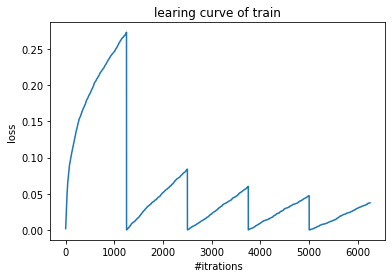

In [ ]:
plt.plot(cnn1.history['loss'])
plt.xlabel('#itrations')
plt.ylabel('loss')
plt.title('learing curve of train')

## 16 predictions from test data

In [ ]:
sample = next(iter(test_loader))  # picking one batch from test data.
imgs, labels = sample
print('samples we want to test with model:' , (imgs.shape, labels.shape))   # we have 16 data in one batch we want to predict 16 samples using cnn model.
real_number = labels.numpy()
print('\nmain test data labels: ', real_number)

samples we want to test with model: (torch.Size([16, 1, 28, 28]), torch.Size([16]))

main test data labels:  [6 5 7 9 5 2 0 6 5 5 2 7 7 6 8 9]


In [ ]:
test_output, last_layer = cnn1(Variable(imgs).float())
y_pred = torch.max(test_output, axis=1)[1].data.numpy()
print('Prediction: ',y_pred)
print('Actual number: ', real_number)

Prediction:  [6 5 7 9 5 2 0 6 5 5 2 7 7 6 8 9]
Actual number:  [6 5 7 9 5 2 0 6 5 5 2 7 7 6 8 9]


In [ ]:
print('CNN model predicted {} correctly'.format(np.count_nonzero(y_pred == real_number)))

CNN model predicted 16 correctly
